# Constant model

## Contents:
1. [Notebook setup](#setup)
2. [Constant model](#avg)

## 1. Notebook setup <a name="setup"></a>

In [1]:
# Install required packages.
# !pip install requirements.txt

# Change directory to main project folder.
import os
print(f'This folder: {os.getcwd()}')
os.chdir("..")
print(f'Project folder: {os.getcwd()}\n')

# Import packages.
import routing
import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dill
from sklearn.model_selection import cross_val_score, KFold

This folder: C:\Users\muell\thesis_main\thesis_code\notebooks - GitHub
Project folder: C:\Users\muell\thesis_main\thesis_code



In [2]:
# Load training data

X_train = pd.read_pickle('data/generated_final_pickle/df_features_train.pickle')
y_train = X_train.pop('distance')
print(X_train.shape, y_train.shape)

(80000, 43) (80000,)


## 2. Constant model <a name="avg"></a>

7736.602500999999
5529.106245037785


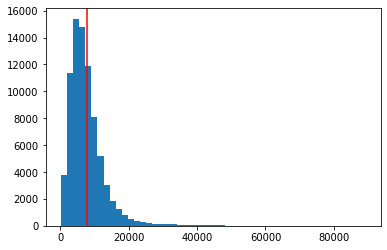

In [3]:
# Analyze response

print(np.mean(y_train))
print(np.std(y_train))
plt.hist(y_train, bins=50)
plt.axvline(x=np.mean(y_train), color='r', linestyle='-')
plt.show()

### Final model

In [4]:
# No training is necessary, we can directly define the final model as the average of the training data
# The mean is the best constant model for minimizing squared errors # https://skeptric.com/constant-models/

In [5]:
# Define the final model

def constant_model(X):
    """Simple baseline that always predicts the training set average."""
    y_pred = np.ones(X.shape[0]) * 7736.602500999999
    return y_pred

In [6]:
# Save the final model

with open('models/baseline_constant.dill', 'wb') as file:
    dill.dump(constant_model, file)

Model performance
--------------------------------------
MSE: 30571015.87
RMSE: 5529.11
MAE: 3664.33
MAPE: 77.35%
R2: 0.0




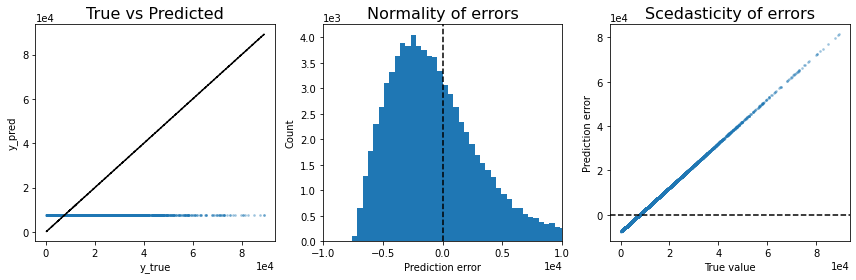

In [6]:
# in-sample evaluation

# make predictions
y_pred = constant_model(X_train)

# Model evaluation
models.evaluate(y_train, y_pred)
models.plot_performance(y_train, y_pred)

### Solomon data <a name="sol"></a>

In [7]:
### LOAD DATASET

df = routing.load_solomon_solutions()
print(df.shape)
print(list(df.columns))
df.head(3)

(168, 4)
['name', 'sol_best_vehicles', 'sol_best_distance', 'sol_best_authors']


,name,sol_best_vehicles,sol_best_distance,sol_best_authors
0,C101.25,3,191.3,KDMSS
1,C201.25,2,214.7,CR+L
2,C101.50,5,362.4,KDMSS


In [8]:
### Analyze and drop NaN values (could not be solved)

# # which columns contain nan
# columns_has_NaN = df.isna().any(axis=0)
# print(columns_has_NaN)

# # which rows contain nan
# row_has_NaN = df.isna().any(axis=1)
# rows_with_NaN = df[row_has_NaN]
# print(rows_with_NaN.shape)

# drop instances without solution
df.dropna(inplace=True)
print(df.shape)

(165, 4)


638.0295151515152
340.95551769199074


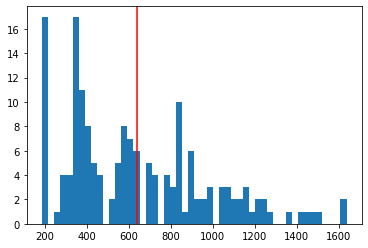

In [9]:
# ANALYZE RESPONSE VARIABLE

df['sol_best_distance'] = df['sol_best_distance'].astype(float)
print(np.mean(df['sol_best_distance']))
print(np.std(df['sol_best_distance']))
#print(df[df['sol_best_distance'] > 20000].shape[0]) # long solution_distance
plt.hist(df['sol_best_distance'], bins=50)
plt.axvline(x=np.mean(df['sol_best_distance']), color='r', linestyle='-')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Set predictors and response
X = df.loc[:, df.columns != 'sol_best_distance']
y = np.array(df['sol_best_distance'])
print('\nX.shape =', X.shape)
print('y.shape =', y.shape)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train.shape =', X_train.shape, 'y_train.shape =', y_train.shape)
print('X_test.shape =', X_test.shape, 'y_test.shape =', y_test.shape)


X.shape = (165, 3)
y.shape = (165,)
X_train.shape = (115, 3) y_train.shape = (115,)
X_test.shape = (50, 3) y_test.shape = (50,)


In [11]:
# Define the baseline model
def average_baseline(X):
    y_pred = np.ones(X.shape[0]) * np.mean(y_train)
    return y_pred

In [12]:
# Model evaluation
y_train_pred = average_baseline(X_train)
y_test_pred = average_baseline(X_test)
models.evaluate(y_test, y_test_pred)

Model performance
--------------------------------------
MSE: 136146.72
RMSE: 368.98
MAE: 306.77
MAPE: 79.25%
R2: -0.04


